# Import Libraries

In [38]:
import numpy as np
import pandas as pd
import sys
import scanpy as sc
import anndata as ann
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import seaborn as sb
import logging
import os
from plotnine import *
import plotnine
import scipy.io
import seaborn as sns

sc.settings.verbosity = 3
sc.logging.print_version_and_date()

sc.logging.print_version_and_date()
sc.logging.print_header()

Running Scanpy 1.7.2, on 2021-08-25 08:08.
Running Scanpy 1.7.2, on 2021-08-25 08:08.
scanpy==1.7.2 anndata==0.7.5 umap==0.4.6 numpy==1.21.0 scipy==1.5.2 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 louvain==0.7.0 leidenalg==0.8.3


In [2]:
# setting the plots size scanpy

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100)
fig=plt.figure(figsize = (5, 7))
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.5 umap==0.4.6 numpy==1.21.0 scipy==1.5.2 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 louvain==0.7.0 leidenalg==0.8.3


<Figure size 500x700 with 0 Axes>

In [3]:
adata = sc.read_h5ad('/mnt/ibm_lg/shoshana/trachasp/adata_scVI_samplesremoved_epoch100.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 12197 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap'
    obsm: 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'raw_counts'
    obsp

# Look at Object

In [5]:
#adata.obsm['X_umap'] = adata.obsm['X_scvi_umap'] - leiden/louvain not embedded so did use_rep="X-scvi"

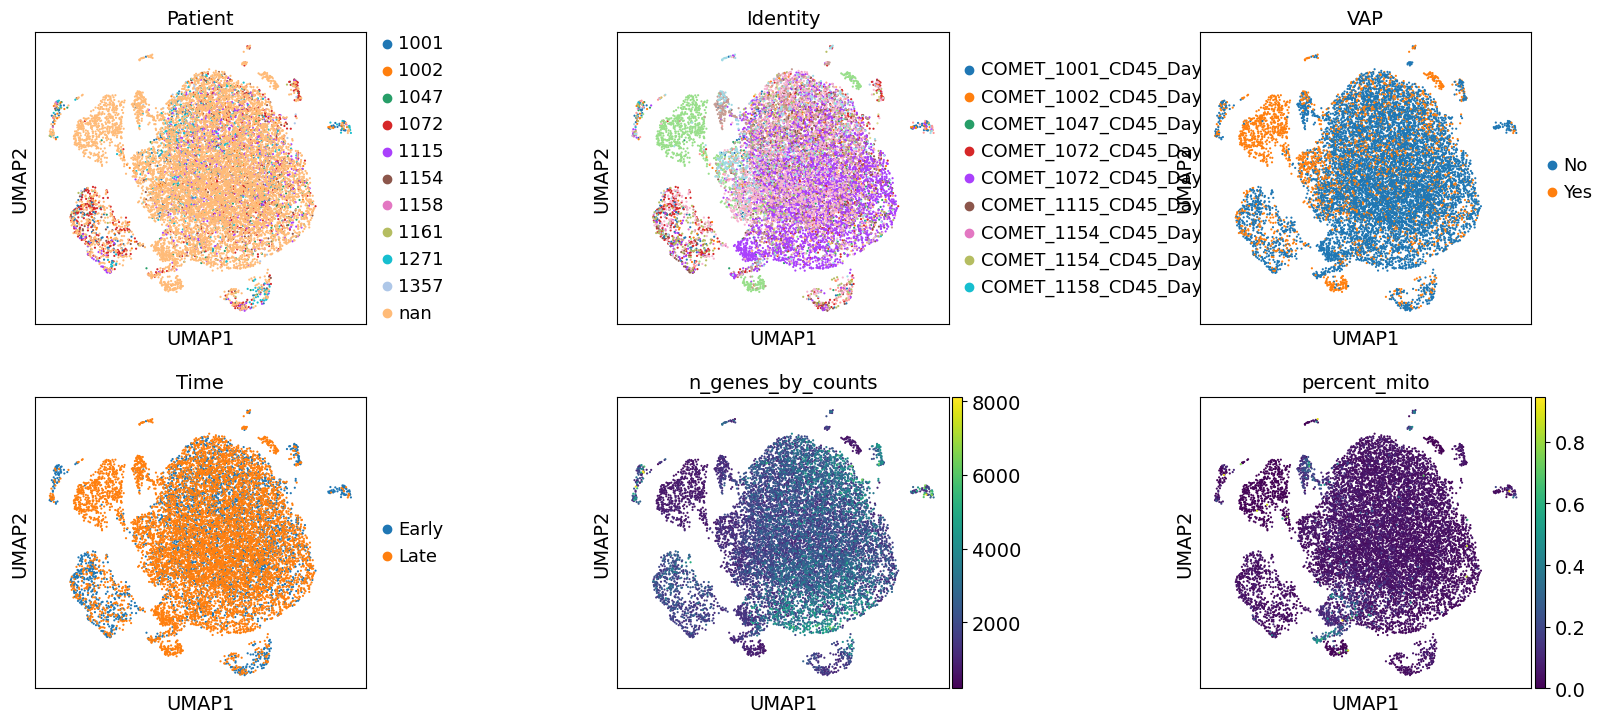

In [6]:
sc.pl.umap(adata, color=['Patient', 'Identity', 'VAP', 'Time', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


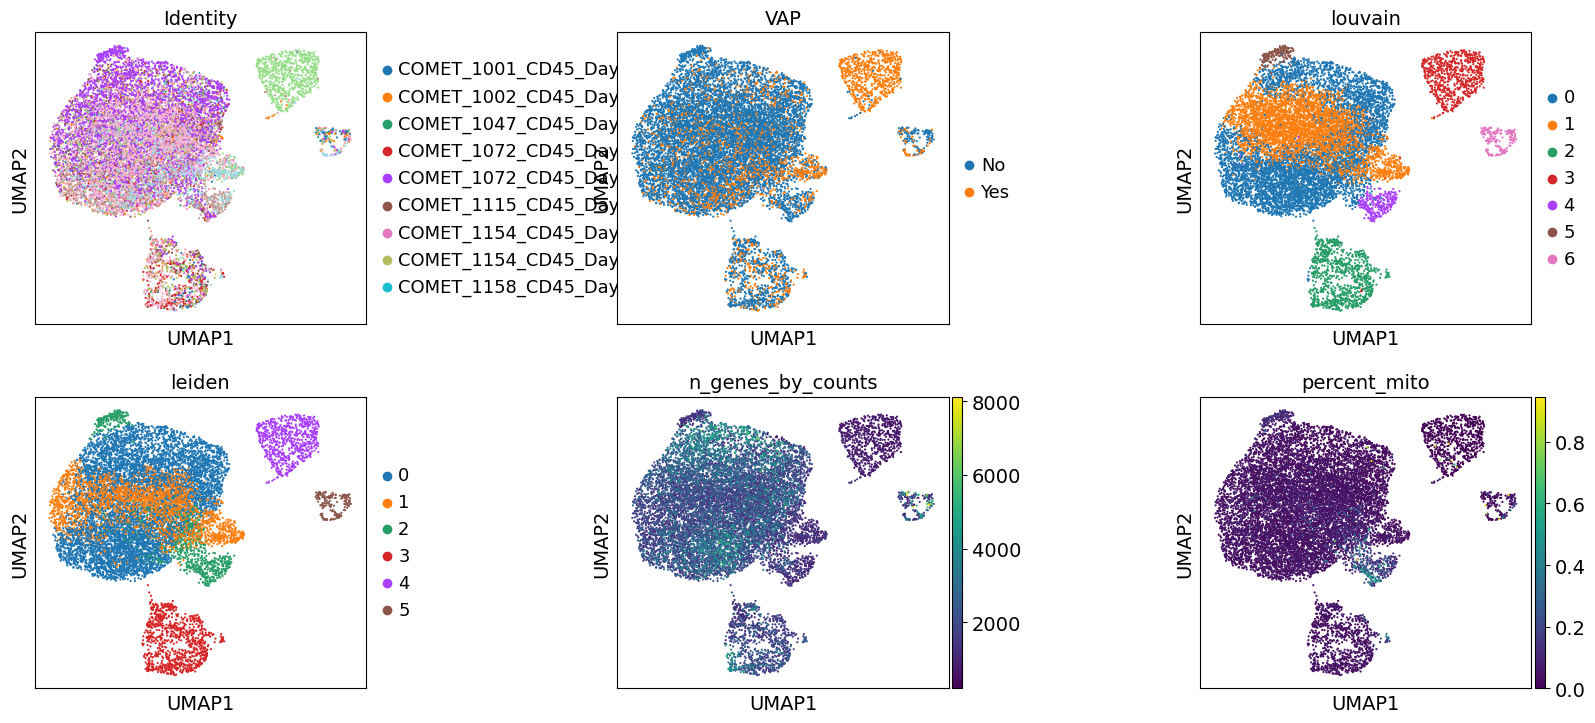

In [7]:
# umap and clustering
### louvain and ledien clustering
sc.pp.neighbors(adata, use_rep="X_scvi")
sc.tl.louvain(adata, resolution = .2)
sc.tl.leiden(adata, resolution = .2)

### UMAP
print('UMAP')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Identity', 'VAP', 'louvain','leiden', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

In [8]:
marker_genes_dict = {'B-cell': ['CD79A', 'MS4A1','MS4A1','CD24','CD19'],
                     'T-cell': ['CD3D','CD3E','LCK',"IL32",'CD2','PTPRCAP'],
                     'T-CD8+': ['CD8A', 'CD8B'],
                     'T-CD4+': ['CD4','GATA3','FOXP3','IL17A','IFNG'],
                     'NK': ['GNLY', 'NKG7','KLRD1'],
                     'Mono/Macro': ['FCGR3A','CD14','CD68','MARCO','C1QA','APOE','APOC1','FCN1','CD163'],
                     'Alveolar Mac':['PPARG','FABP4','SERPING1','MRC1','LAMP2'],
                     'Monocyte':['CD14','S100A8','S100A9','SELL','IRF7','LY6E'],
                     'Neutrophil':['FCGR3B','CXCR2','PROK2','S100A8','SRGN','NAMPT'],
                     'Dendritic': ['LAMP3','CD1E','HLA-DOA','HLA-DOB','IRF8','SIRPA'],
                     'Epithelial':['KRT18','EPCAM','KRT17'],
                     'Basal':['KRT5','TP63','TP63','DAPL1'],                   
                     'Secretory':['SPDEF','CREB3L1','MUC5B','MUC5AC'],
                     'Ciliated':['FOXJ1','SNTN','CDHR3','TPPP3','TUBB1','TP73','CCDC78'],  
                     'AT1':['AGER','PDPN','CLIC5'],
                     'AT2':['SFTPB','SFTPC','SFTPD','MUC1','ETV5'],}

# Subcluster

In [9]:
adataMM = adata[adata.obs['leiden'].isin(['0','1','2'])]

In [10]:
adataMM

View of AnnData object with n_obs × n_vars = 10345 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


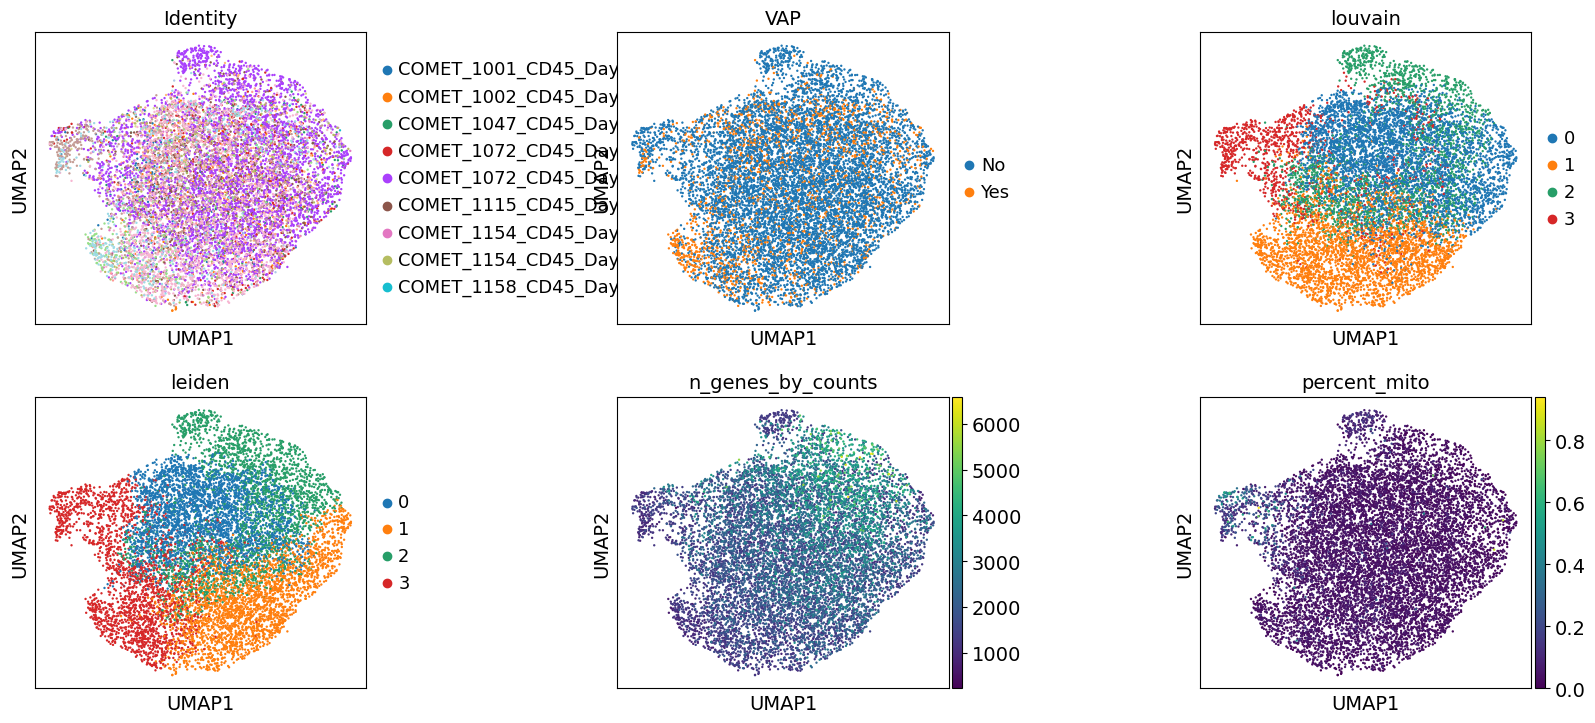

In [11]:
# umap and clustering
### louvain and ledien clustering
sc.pp.neighbors(adataMM, use_rep="X_scvi")
sc.tl.louvain(adataMM, resolution = .2)
sc.tl.leiden(adataMM, resolution = .2)

### UMAP
print('UMAP')
sc.tl.umap(adataMM)
sc.pl.umap(adataMM, color=['Identity', 'VAP', 'louvain','leiden', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:21)
Storing dendrogram info using `.uns['dendrogram_louvain']`
categories: 0, 1, 2, etc.
var_group_labels: B-cell, T-cell, T-CD8+, etc.


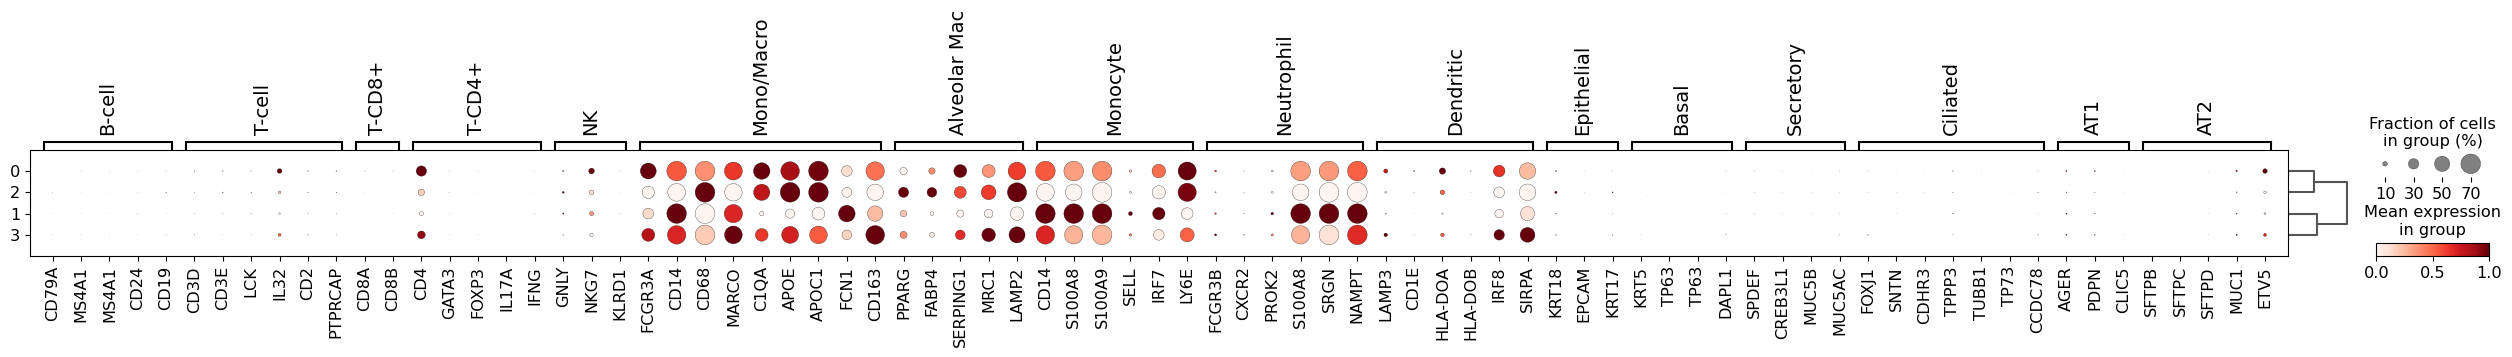

In [12]:
ax = sc.pl.dotplot(adataMM, marker_genes_dict, 
                   groupby='louvain',dot_max=0.7, standard_scale='var',dendrogram=True)

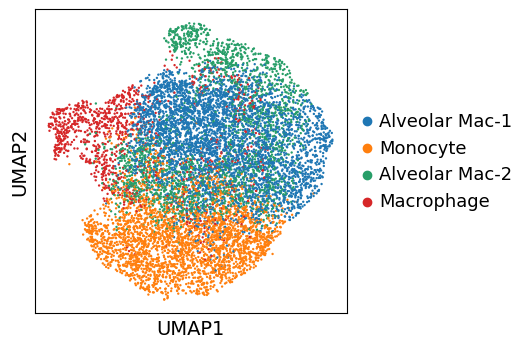

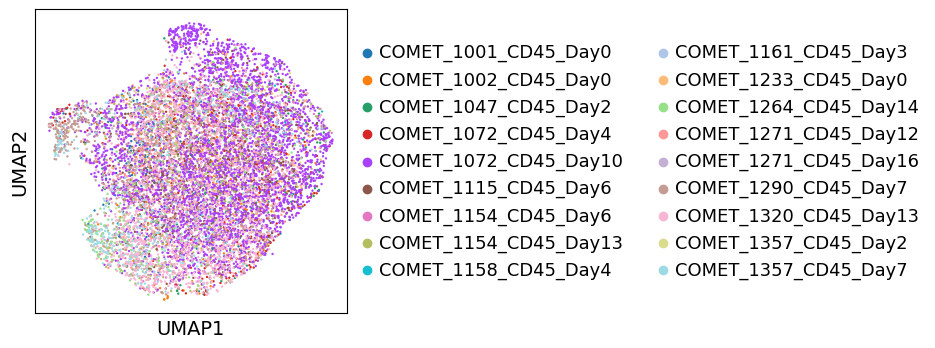

In [13]:
# mark the cell types

new_cluster_names = ['Alveolar Mac-1','Monocyte','Alveolar Mac-2', 'Macrophage']
adataMM.rename_categories('louvain', new_cluster_names)

sc.pl.umap(adataMM, color='louvain', title='', frameon=True, save='.pdf')
sc.pl.umap(adataMM, color='Identity', title='', frameon=True, save='.pdf')

In [14]:
for i in adataMM.obs.index:
    adata.obs.loc[i, 'cell_type'] = adataMM.obs.loc[i, 'louvain']

In [15]:
adataT=adata[adata.obs['leiden'] == '3']

In [16]:
adataT

View of AnnData object with n_obs × n_vars = 968 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden', 'cell_type'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
... storing 'cell_type' as categorical


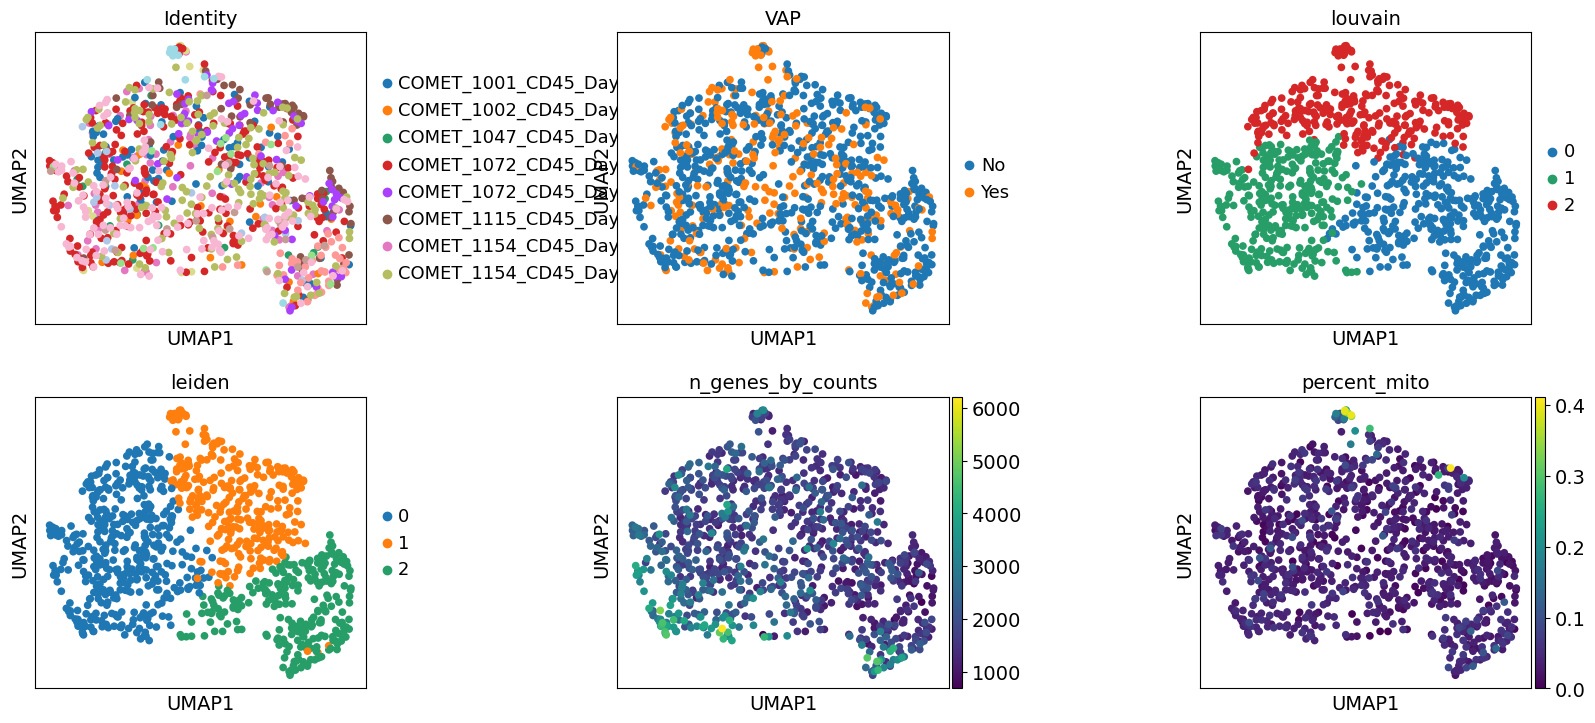

In [17]:
# umap and clustering
### louvain and ledien clustering
sc.pp.neighbors(adataT, use_rep="X_scvi")
sc.tl.louvain(adataT, resolution = .2)
sc.tl.leiden(adataT, resolution = .18)

### UMAP
print('UMAP')
sc.tl.umap(adataT)
sc.pl.umap(adataT, color=['Identity', 'VAP', 'louvain','leiden', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:02)
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2
var_group_labels: B-cell, T-cell, T-CD8+, etc.


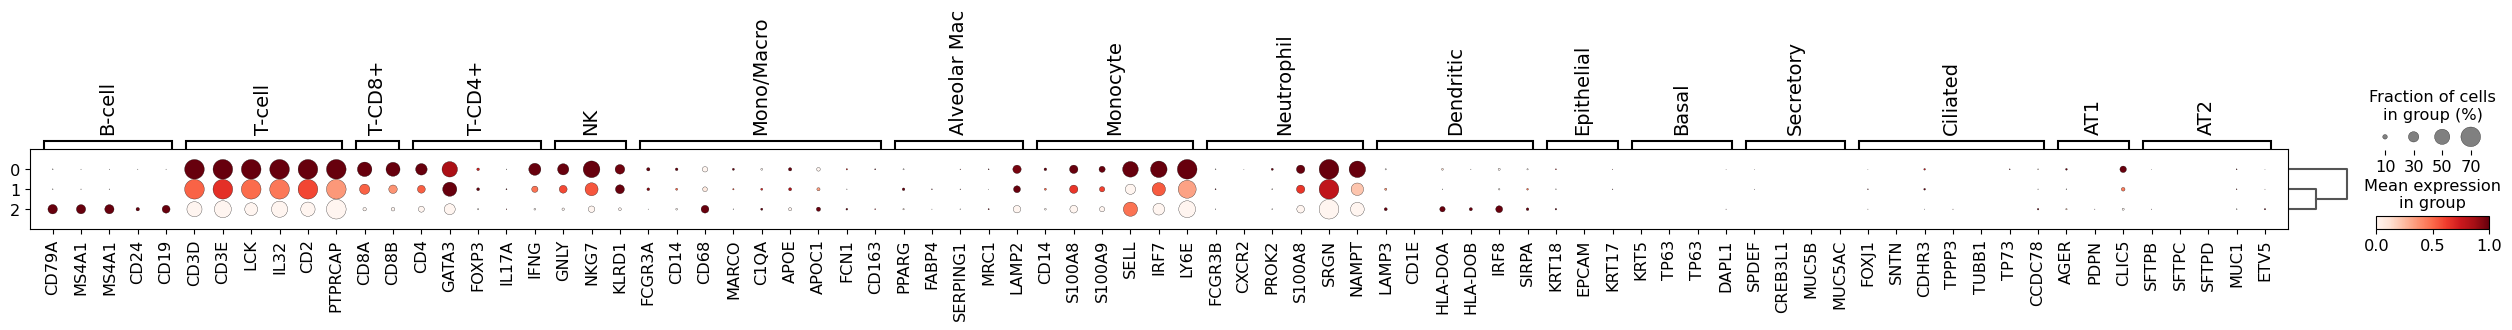

In [18]:
ax = sc.pl.dotplot(adataT, marker_genes_dict, 
                   groupby='leiden',dot_max=0.7, standard_scale='var',dendrogram=True)

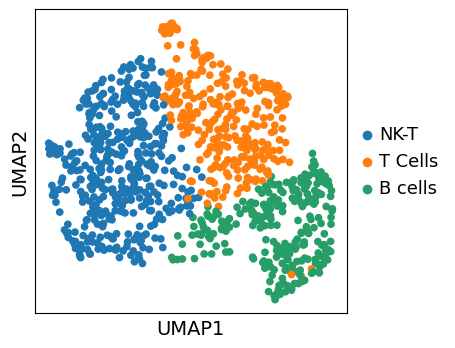

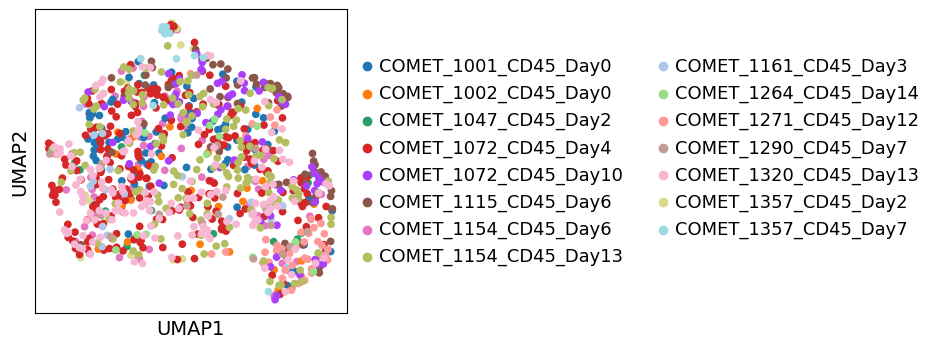

In [19]:
# mark the cell types

new_cluster_names = ['NK-T', 'T Cells', 'B cells']
adataT.rename_categories('leiden', new_cluster_names)

sc.pl.umap(adataT, color='leiden', title='', frameon=True, save='.pdf')
sc.pl.umap(adataT, color='Identity', title='', frameon=True, save='.pdf')

In [20]:
for i in adataT.obs.index:
    adata.obs.loc[i, 'cell_type'] = adataT.obs.loc[i, 'leiden']

In [21]:
adataN=adata[adata.obs['leiden'] == '4']

In [22]:
adataN

View of AnnData object with n_obs × n_vars = 702 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden', 'cell_type'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 1 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 1 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
... storing 'cell_type' as categorical


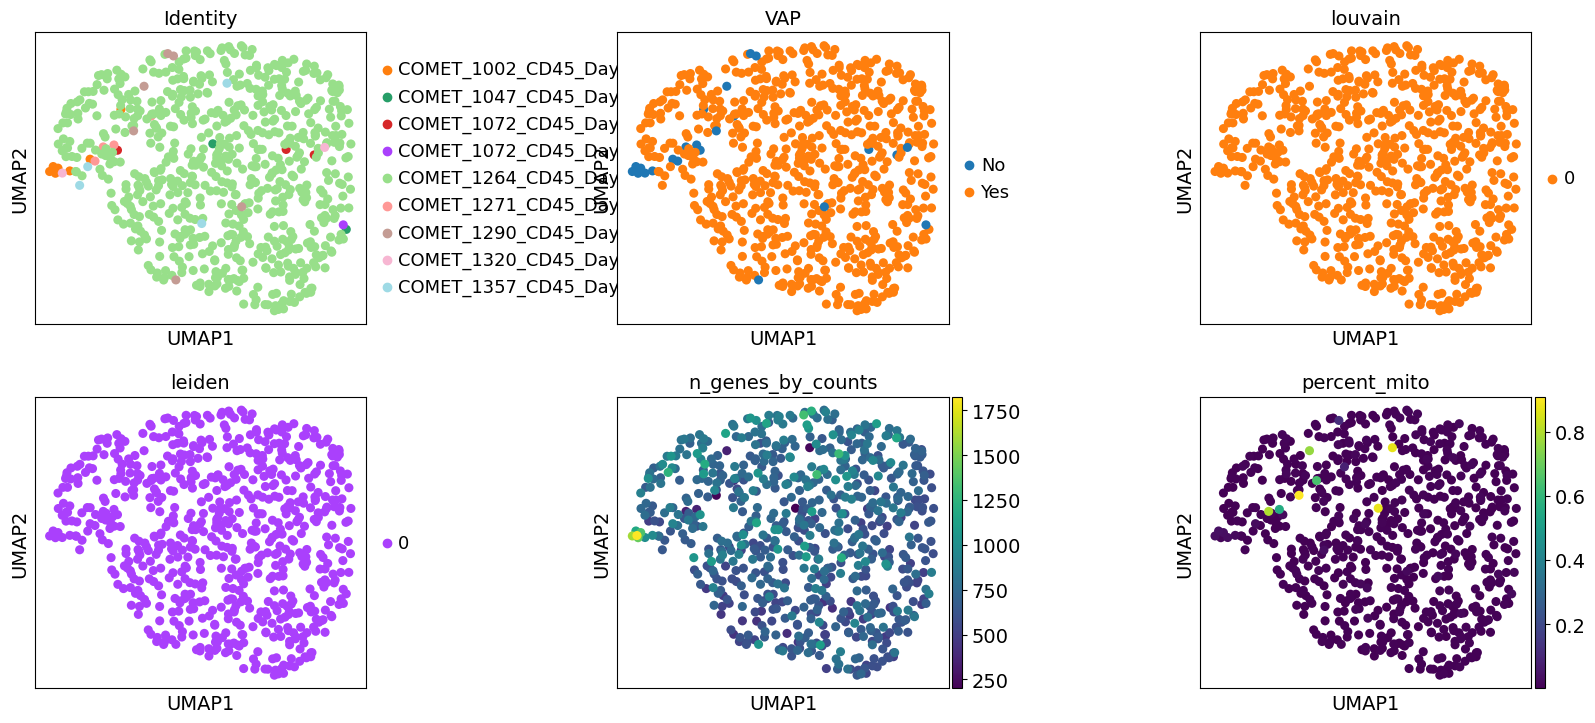

In [23]:
# umap and clustering
### louvain and ledien clustering
sc.pp.neighbors(adataN, use_rep="X_scvi")
sc.tl.louvain(adataN, resolution = .1)
sc.tl.leiden(adataN, resolution = .1)

### UMAP
print('UMAP')
sc.tl.umap(adataN)
sc.pl.umap(adataN, color=['Identity', 'VAP', 'louvain','leiden', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

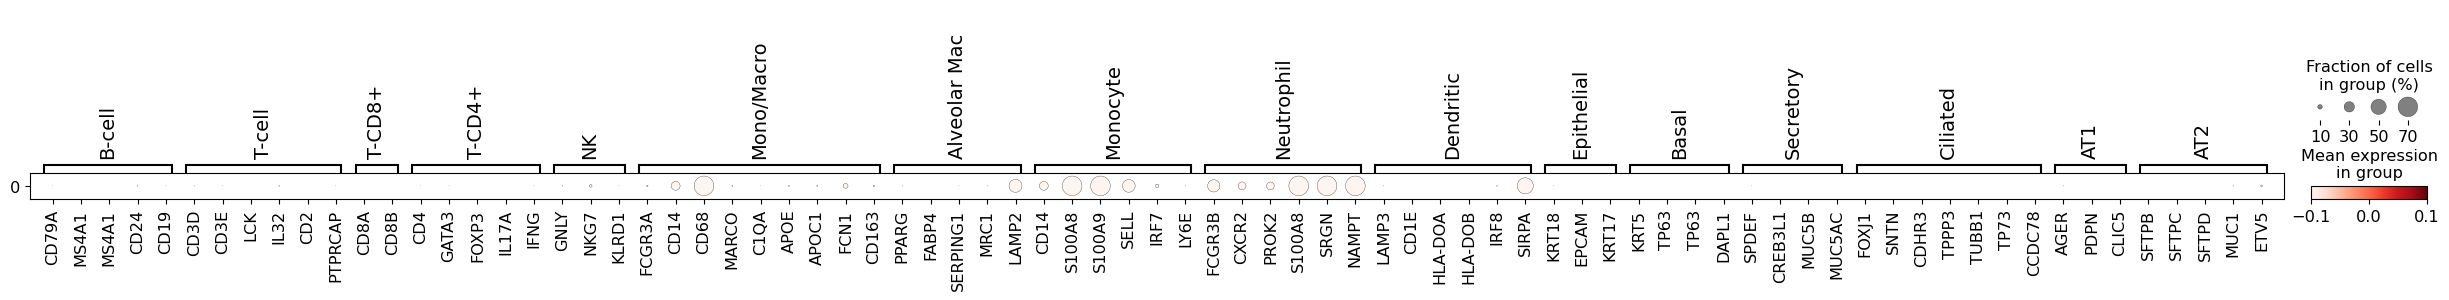

In [24]:
ax = sc.pl.dotplot(adataN, marker_genes_dict, 
                   groupby='louvain',dot_max=0.7, standard_scale='var',dendrogram=True)

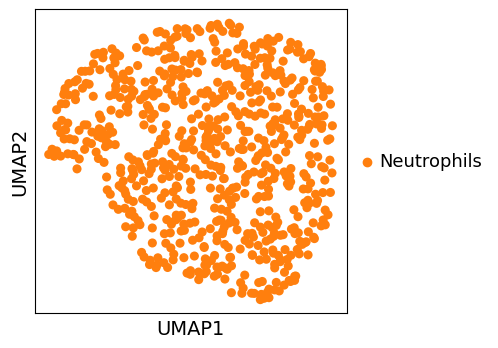

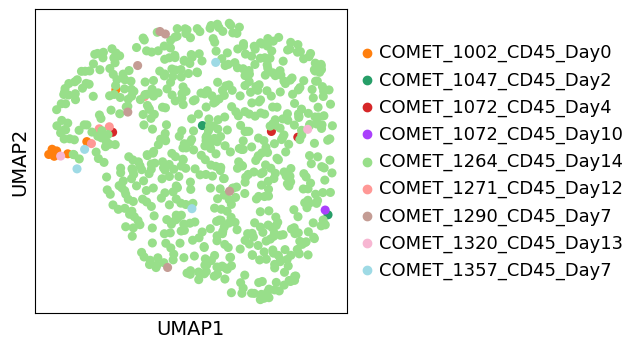

In [25]:
# mark the cell types

new_cluster_names = ['Neutrophils']
adataN.rename_categories('louvain', new_cluster_names)

sc.pl.umap(adataN, color='louvain', title='', frameon=True, save='.pdf')
sc.pl.umap(adataN, color='Identity', title='', frameon=True, save='.pdf')

In [26]:
for i in adataN.obs.index:
    adata.obs.loc[i, 'cell_type'] = adataN.obs.loc[i, 'louvain']

In [27]:
adataEpi=adata[adata.obs['leiden'] == '5']

In [28]:
adataEpi

View of AnnData object with n_obs × n_vars = 182 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden', 'cell_type'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 1 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)
... storing 'cell_type' as categorical


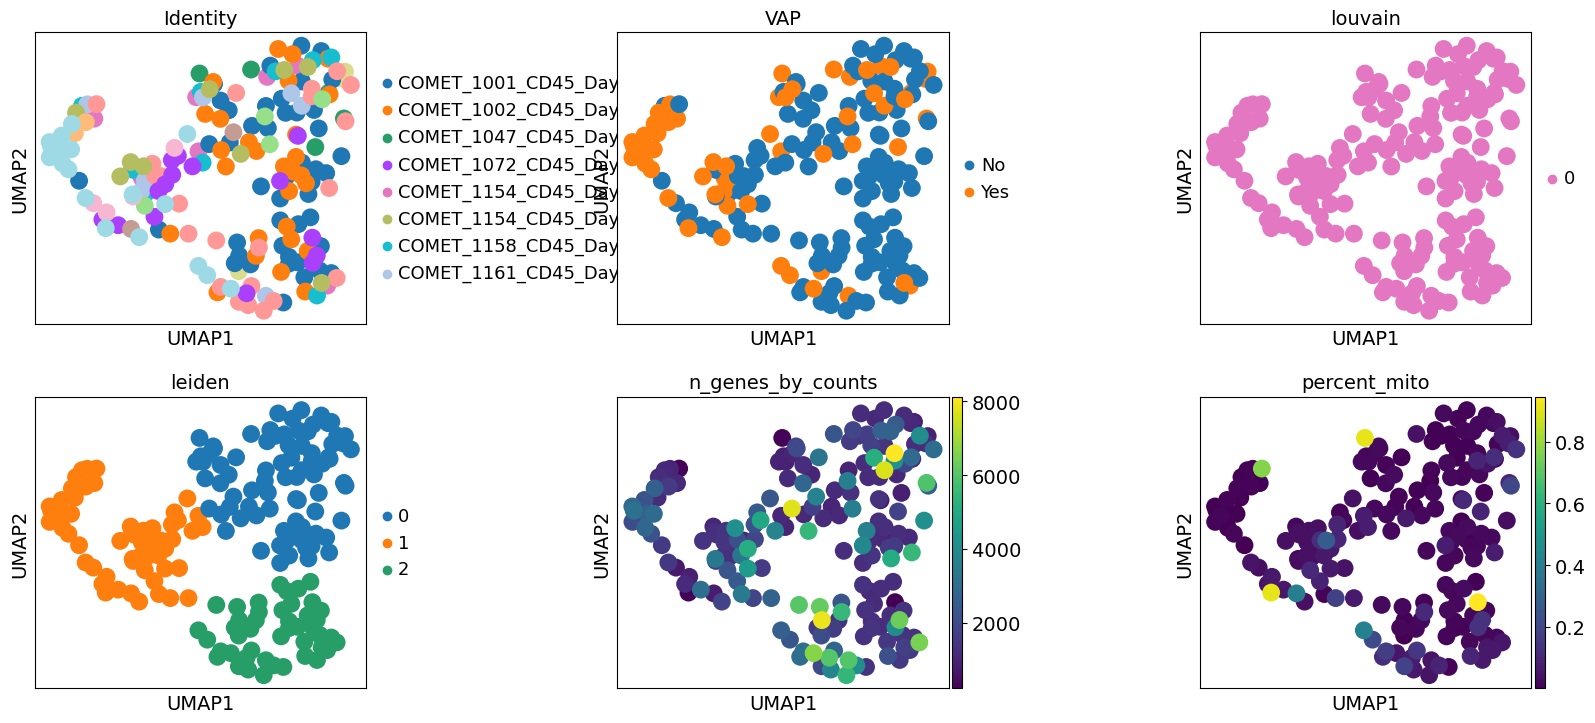

In [29]:
# umap and clustering
### louvain and ledien clustering
sc.pp.neighbors(adataEpi, use_rep="X_scvi")
sc.tl.louvain(adataEpi, resolution = .1)
sc.tl.leiden(adataEpi, resolution = .1)

### UMAP
print('UMAP')
sc.tl.umap(adataEpi)
sc.pl.umap(adataEpi, color=['Identity', 'VAP', 'louvain','leiden', 'n_genes_by_counts', 'percent_mito'], ncols=3, wspace=0.6)

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2
var_group_labels: B-cell, T-cell, T-CD8+, etc.


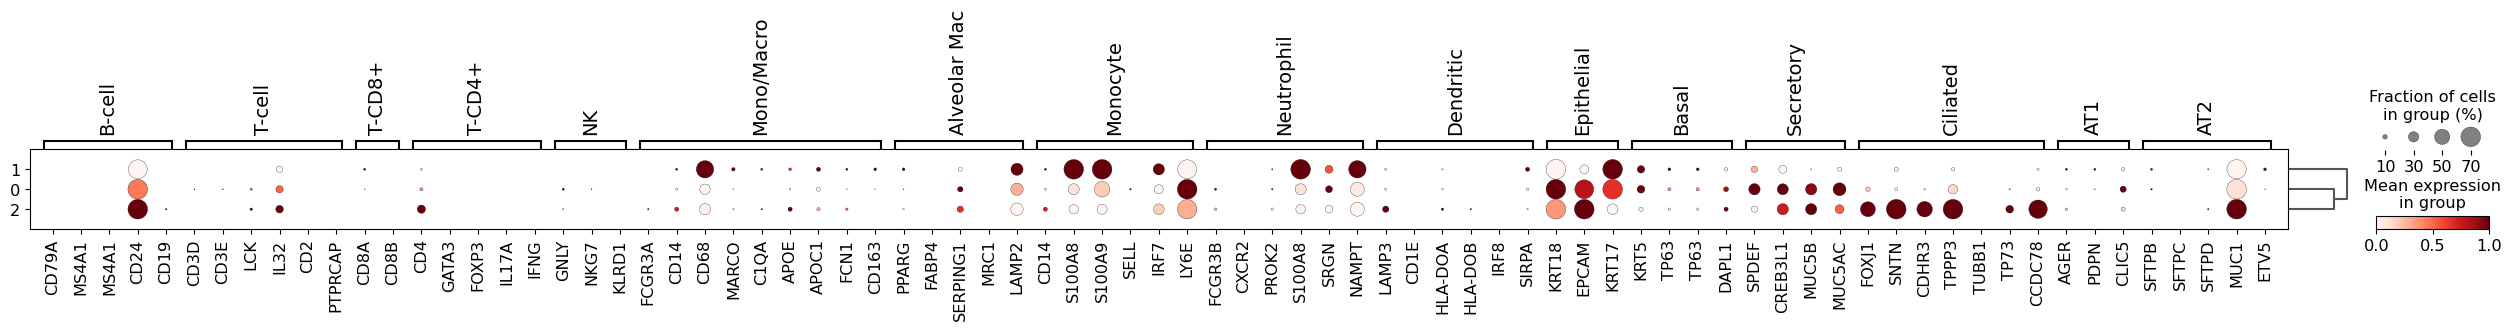

In [30]:
ax = sc.pl.dotplot(adataEpi, marker_genes_dict, 
                   groupby='leiden',dot_max=0.7, standard_scale='var',dendrogram=True)

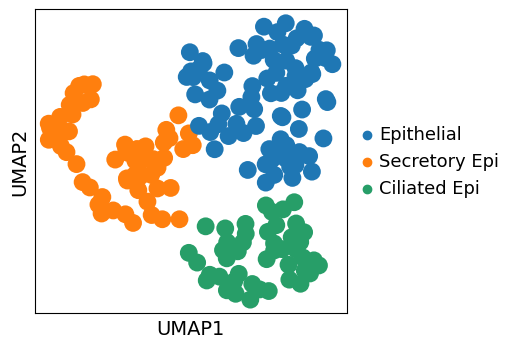

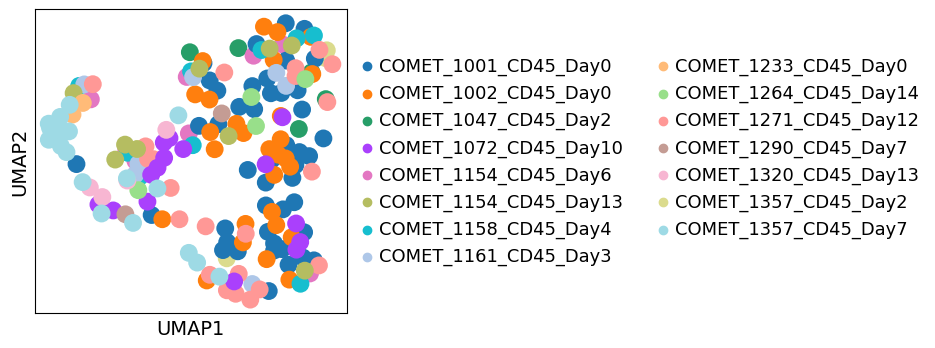

In [31]:
# mark the cell types

new_cluster_names = ['Epithelial','Secretory Epi','Ciliated Epi']
adataEpi.rename_categories('leiden', new_cluster_names)

sc.pl.umap(adataEpi, color='leiden', title='', frameon=True, save='.pdf')
sc.pl.umap(adataEpi, color='Identity', title='', frameon=True, save='.pdf')

In [32]:
for i in adataEpi.obs.index:
    adata.obs.loc[i, 'cell_type'] = adataEpi.obs.loc[i, 'leiden']

# Recombing Object

In [33]:
adata

AnnData object with n_obs × n_vars = 12197 × 33534
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_genes', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'louvain', 'leiden', 'cell_type'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Identity_colors', 'Patient_colors', 'Time_colors', 'VAP_colors', '_scvi', '_training_mode', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'le

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
... storing 'cell_type' as categorical


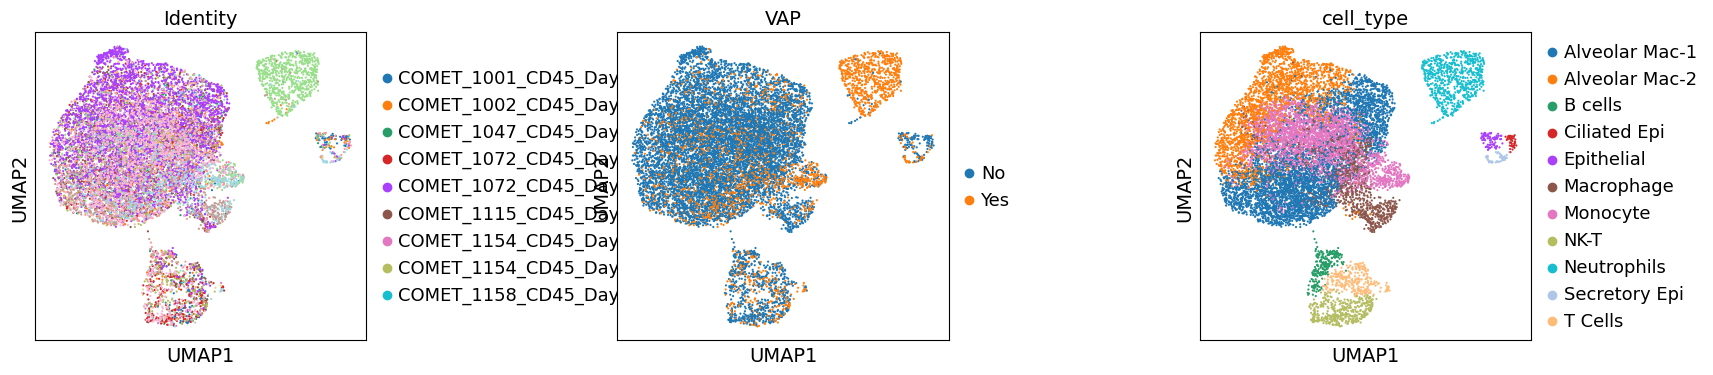

In [34]:
# umap and clustering
### louvain and ledien clustering
sc.pp.neighbors(adata, use_rep="X_scvi")
sc.tl.louvain(adata, resolution = .2)
sc.tl.leiden(adata, resolution = .2)

### UMAP
print('UMAP')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Identity', 'VAP', 'cell_type'], ncols=3, wspace=0.6)

In [35]:
### writing h5ad 
adata.write_h5ad('/mnt/ibm_lg/shoshana/trachasp/adata_removesamples_scVI100_annotated_subclust.h5ad')

# further UMAPs for paper

In [39]:
cmap = LinearSegmentedColormap.from_list("", ['#009ACD','#F9F4EC','#8B0A50'])
#custom_cmap = ListedColormap(['deepskyblue3','#F9F4EC','deeppink4')

computing density on 'umap'
--> added
    'umap_density_VAP', densities (adata.obs)
    'umap_density_VAP_params', parameter (adata.uns)
/data/shoshana/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:364: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


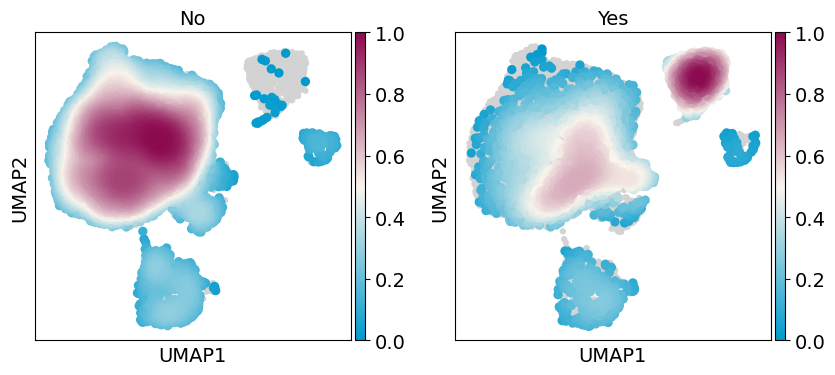

In [40]:
sc.tl.embedding_density(adata, groupby='VAP', basis='umap')
sc.pl.embedding_density(adata, key='umap_density_VAP', color_map=cmap)

In [41]:
adataEarly = adata[adata.obs['Time'].isin(['Early'])]

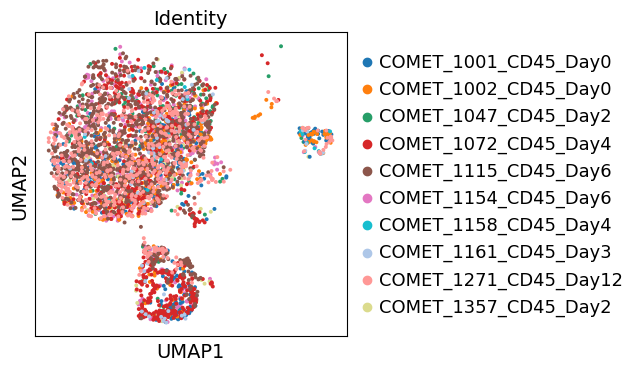

In [42]:
sc.pl.umap(adataEarly, color=['Identity', ], ncols=3, wspace=0.6)

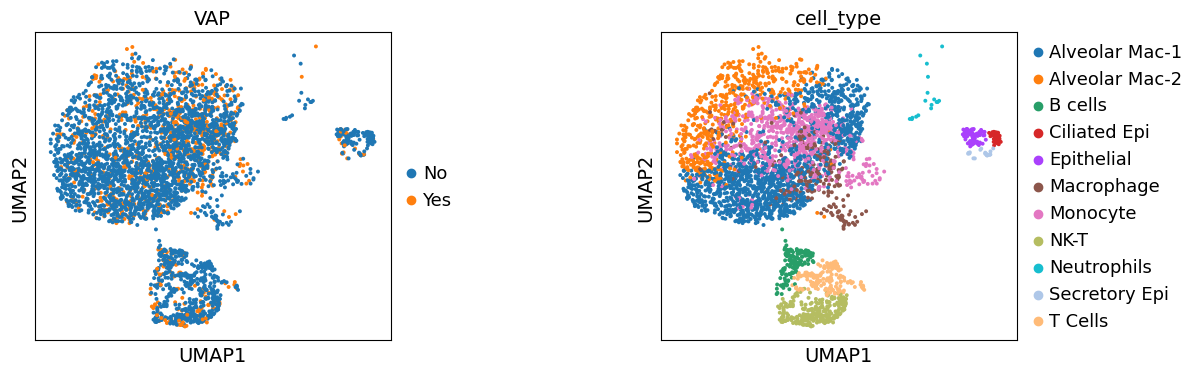

In [43]:
sc.pl.umap(adataEarly, color=['VAP', 'cell_type'], ncols=3, wspace=0.6)

In [44]:
adataLate = adata[adata.obs['Time'].isin(['Late'])]

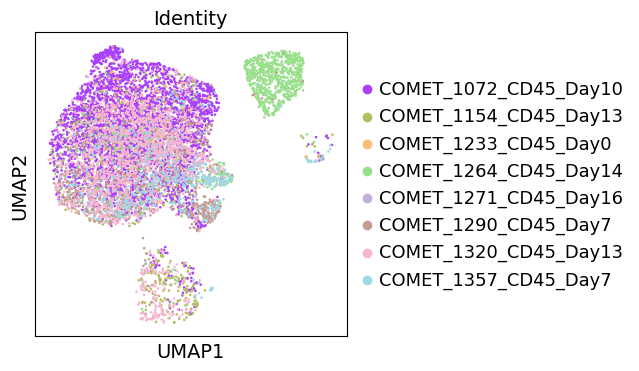

In [45]:
sc.pl.umap(adataLate, color=['Identity'], ncols=3, wspace=0.6)

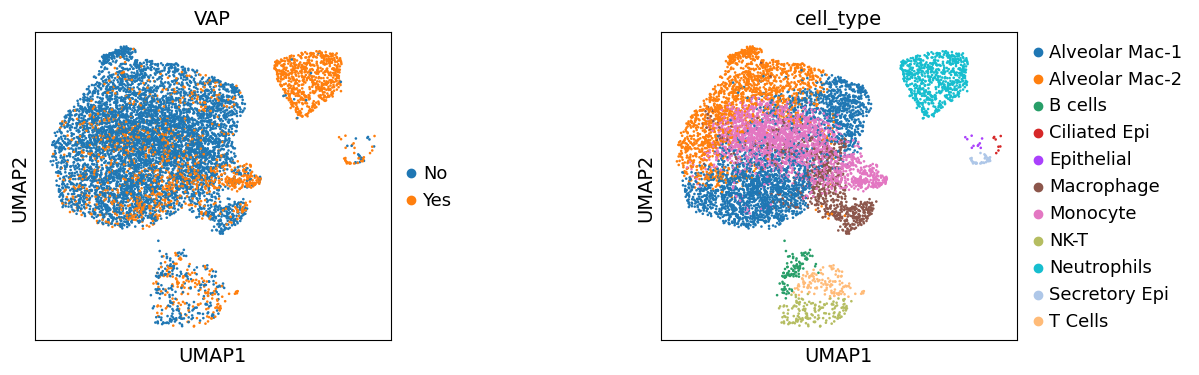

In [46]:
sc.pl.umap(adataLate, color=['VAP', 'cell_type'], ncols=3, wspace=0.6)

# cell numbers

In [47]:
cell_type_title = 'cell_type'

cell_df = pd.DataFrame()
for cell_type in set(adataEarly.obs[cell_type_title]):
    cell_n_list = []
    for patient_id in set(adataEarly.obs['Identity']):
        input_adata = adataEarly[adataEarly.obs[cell_type_title] == cell_type]
        input_adata = input_adata[input_adata.obs['Identity'] == patient_id]
        cell_n_list.append(len(input_adata))
    
    cell_df[cell_type] = cell_n_list
    
cell_df.index = set(adataEarly.obs['Identity'])
cell_df.to_csv('/mnt/ibm_lg/shoshana/trachasp/EarlyHighClustCellNumb.csv')
cell_df

Alveolar Mac-2  Ciliated Epi  Alveolar Mac-1  B cells  \
COMET_1047_CD45_Day2               36             0              76        7   
COMET_1072_CD45_Day4               83             0             214       40   
COMET_1357_CD45_Day2                7             1              52        3   
COMET_1002_CD45_Day0               14             8             138        7   
COMET_1115_CD45_Day6              196             0             430       24   
COMET_1161_CD45_Day3                7             1              20        5   
COMET_1154_CD45_Day6               78             1             182       13   
COMET_1271_CD45_Day12              86             9             238       34   
COMET_1158_CD45_Day4                4             1               6        0   
COMET_1001_CD45_Day0               25            16              75       10   

                       Secretory Epi  T Cells  Macrophage  Epithelial  \
COMET_1047_CD45_Day2               0        0          22           5   
COMET_1072_CD45_Day4               0       67          40           0   
COMET_1357_CD45_Day2               1        5          20           2   
COMET_1002_CD45_Day0               1        5          16          19   
COMET_1115_CD45_Day6               0       33          47           0   
COMET_1161_CD45_Day3               3        0           4           3   
COMET_1154_CD45_Day6               4       14          27           3   
COMET_1271_CD45_Day12              6        8          48           7   
COMET_1158_CD45_Day4               4        0           1           4   
COMET_1001_CD45_Day0               2       29          21          27   

                       Monocyte  Neutrophils  NK-T  
COMET_1047_CD45_Day2         35            2     9  
COMET_1072_CD45_Day4        101            3   135  
COMET_1357_CD45_Day2         26            0     5  
COMET_1002_CD45_Day0         93            8    13  
COMET_1115_CD45_Day6        190            0     9  
COMET_1161_CD45_Day3         13            0    12  
COMET_1154_CD45_Day6        116            0    40  
COMET_1271_CD45_Day12       144            4     0  
COMET_1158_CD45_Day4          2            0     0  
COMET_1001_CD45_Day0         73            0    52

In [48]:
cell_type_title = 'cell_type'

cell_df = pd.DataFrame()
for cell_type in set(adataEarly.obs[cell_type_title]):
    cell_n_list = []
    for patient_id in set(adataEarly.obs['VAP']):
        input_adata = adataEarly[adataEarly.obs[cell_type_title] == cell_type]
        input_adata = input_adata[input_adata.obs['VAP'] == patient_id]
        cell_n_list.append(len(input_adata))
    
    cell_df[cell_type] = cell_n_list
    
cell_df.index = set(adataEarly.obs['VAP'])
cell_df

Alveolar Mac-2  Ciliated Epi  Alveolar Mac-1  B cells  Secretory Epi  \
Yes             128             3             330       28              8   
No              408            34            1101      115             13   

     T Cells  Macrophage  Epithelial  Monocyte  Neutrophils  NK-T  
Yes       19          73          13       190            2    66  
No       142         173          57       603           15   209

In [49]:
cell_type_title = 'cell_type'

cell_df = pd.DataFrame()
for cell_type in set(adataLate.obs[cell_type_title]):
    cell_n_list = []
    for patient_id in set(adataLate.obs['Identity']):
        input_adata = adataLate[adataLate.obs[cell_type_title] == cell_type]
        input_adata = input_adata[input_adata.obs['Identity'] == patient_id]
        cell_n_list.append(len(input_adata))
    
    cell_df[cell_type] = cell_n_list
    
cell_df.index = set(adataLate.obs['Identity'])
cell_df.to_csv('/mnt/ibm_lg/shoshana/trachasp/LateHighClustCellNumb.csv')
cell_df

Alveolar Mac-2  Ciliated Epi  Alveolar Mac-1  B cells  \
COMET_1264_CD45_Day14              38             0              56        3   
COMET_1072_CD45_Day10            1226             4            1330       21   
COMET_1320_CD45_Day13             184             0             567       37   
COMET_1271_CD45_Day16               3             0              18        0   
COMET_1290_CD45_Day7               91             0             373        8   
COMET_1357_CD45_Day7               16             3             176        1   
COMET_1154_CD45_Day13              32             1             113       33   
COMET_1233_CD45_Day0               38             0              41        0   

                       Secretory Epi  T Cells  Macrophage  Epithelial  \
COMET_1264_CD45_Day14              1        5          13           3   
COMET_1072_CD45_Day10              9       35         477           2   
COMET_1320_CD45_Day13              4       25          67           0   
COMET_1271_CD45_Day16              0        0           0           0   
COMET_1290_CD45_Day7               1        4         220           1   
COMET_1357_CD45_Day7              15        9          54           0   
COMET_1154_CD45_Day13              4       53          15           4   
COMET_1233_CD45_Day0               2        0           4           0   

                       Monocyte  Neutrophils  NK-T  
COMET_1264_CD45_Day14       185          672     5  
COMET_1072_CD45_Day10       771            1     9  
COMET_1320_CD45_Day13       750            2    77  
COMET_1271_CD45_Day16         2            0     0  
COMET_1290_CD45_Day7        181            6     6  
COMET_1357_CD45_Day7        204            4     2  
COMET_1154_CD45_Day13        80            0    56  
COMET_1233_CD45_Day0         14            0     0

In [50]:
cell_type_title = 'cell_type'

cell_df = pd.DataFrame()
for cell_type in set(adataLate.obs[cell_type_title]):
    cell_n_list = []
    for patient_id in set(adataLate.obs['VAP']):
        input_adata = adataLate[adataLate.obs[cell_type_title] == cell_type]
        input_adata = input_adata[input_adata.obs['VAP'] == patient_id]
        cell_n_list.append(len(input_adata))
    
    cell_df[cell_type] = cell_n_list
    
cell_df.index = set(adataLate.obs['VAP'])
cell_df

Alveolar Mac-2  Ciliated Epi  Alveolar Mac-1  B cells  Secretory Epi  \
Yes             124             4             386       37             22   
No             1504             4            2288       66             14   

     T Cells  Macrophage  Epithelial  Monocyte  Neutrophils  NK-T  
Yes       67          86           7       483          676    63  
No        64         764           3      1704            9    92

In [51]:
cell_type_title = 'cell_type'

cell_df = pd.DataFrame()
for cell_type in set(adata.obs[cell_type_title]):
    cell_n_list = []
    for patient_id in set(adata.obs['Identity']):
        input_adata = adata[adata.obs[cell_type_title] == cell_type]
        input_adata = input_adata[input_adata.obs['Identity'] == patient_id]
        cell_n_list.append(len(input_adata))
    
    cell_df[cell_type] = cell_n_list
    
cell_df.index = set(adata.obs['Identity'])
cell_df.to_csv('/mnt/ibm_lg/shoshana/trachasp/ALLadataHighClustCellNumb.csv')
cell_df

Alveolar Mac-2  Ciliated Epi  Alveolar Mac-1  B cells  \
COMET_1264_CD45_Day14              38             0              56        3   
COMET_1047_CD45_Day2               36             0              76        7   
COMET_1072_CD45_Day4               83             0             214       40   
COMET_1072_CD45_Day10            1226             4            1330       21   
COMET_1233_CD45_Day0               38             0              41        0   
COMET_1320_CD45_Day13             184             0             567       37   
COMET_1357_CD45_Day2                7             1              52        3   
COMET_1002_CD45_Day0               14             8             138        7   
COMET_1271_CD45_Day16               3             0              18        0   
COMET_1357_CD45_Day7               16             3             176        1   
COMET_1290_CD45_Day7               91             0             373        8   
COMET_1115_CD45_Day6              196             0             430       24   
COMET_1161_CD45_Day3                7             1              20        5   
COMET_1154_CD45_Day6               78             1             182       13   
COMET_1154_CD45_Day13              32             1             113       33   
COMET_1271_CD45_Day12              86             9             238       34   
COMET_1158_CD45_Day4                4             1               6        0   
COMET_1001_CD45_Day0               25            16              75       10   

                       Secretory Epi  T Cells  Macrophage  Epithelial  \
COMET_1264_CD45_Day14              1        5          13           3   
COMET_1047_CD45_Day2               0        0          22           5   
COMET_1072_CD45_Day4               0       67          40           0   
COMET_1072_CD45_Day10              9       35         477           2   
COMET_1233_CD45_Day0               2        0           4           0   
COMET_1320_CD45_Day13              4       25          67           0   
COMET_1357_CD45_Day2               1        5          20           2   
COMET_1002_CD45_Day0               1        5          16          19   
COMET_1271_CD45_Day16              0        0           0           0   
COMET_1357_CD45_Day7              15        9          54           0   
COMET_1290_CD45_Day7               1        4         220           1   
COMET_1115_CD45_Day6               0       33          47           0   
COMET_1161_CD45_Day3               3        0           4           3   
COMET_1154_CD45_Day6               4       14          27           3   
COMET_1154_CD45_Day13              4       53          15           4   
COMET_1271_CD45_Day12              6        8          48           7   
COMET_1158_CD45_Day4               4        0           1           4   
COMET_1001_CD45_Day0               2       29          21          27   

                       Monocyte  Neutrophils  NK-T  
COMET_1264_CD45_Day14       185          672     5  
COMET_1047_CD45_Day2         35            2     9  
COMET_1072_CD45_Day4        101            3   135  
COMET_1072_CD45_Day10       771            1     9  
COMET_1233_CD45_Day0         14            0     0  
COMET_1320_CD45_Day13       750            2    77  
COMET_1357_CD45_Day2         26            0     5  
COMET_1002_CD45_Day0         93            8    13  
COMET_1271_CD45_Day16         2            0     0  
COMET_1357_CD45_Day7        204            4     2  
COMET_1290_CD45_Day7        181            6     6  
COMET_1115_CD45_Day6        190            0     9  
COMET_1161_CD45_Day3         13            0    12  
COMET_1154_CD45_Day6        116            0    40  
COMET_1154_CD45_Day13        80            0    56  
COMET_1271_CD45_Day12       144            4     0  
COMET_1158_CD45_Day4          2            0     0  
COMET_1001_CD45_Day0         73            0    52

In [52]:
cell_type_title = 'cell_type'

cell_df = pd.DataFrame()
for cell_type in set(adata.obs[cell_type_title]):
    cell_n_list = []
    for patient_id in set(adata.obs['VAP']):
        input_adata = adata[adata.obs[cell_type_title] == cell_type]
        input_adata = input_adata[input_adata.obs['VAP'] == patient_id]
        cell_n_list.append(len(input_adata))
    
    cell_df[cell_type] = cell_n_list
    
cell_df.index = set(adata.obs['VAP'])
cell_df

Alveolar Mac-2  Ciliated Epi  Alveolar Mac-1  B cells  Secretory Epi  \
Yes             252             7             716       65             30   
No             1912            38            3389      181             27   

     T Cells  Macrophage  Epithelial  Monocyte  Neutrophils  NK-T  
Yes       86         159          20       673          678   129  
No       206         937          60      2307           24   301